## Model 1b: Single-country policy simulation

The objective of this model-based simulation is to analyse the impact of policy, technology, and commodity changes on consumer price inflation in selected countries. The simulation environment is learnt from real data, after which simulations using synthetic data are used to do policy analysis by manipulating a number of selected variables such as government debt, cellular subscription, gdp growth, and real interest rates in the synthetic data. A secondary purpose of the simulation model is to identify and map the interactions between world-level and country-level indicator variables.

#### Features
------------

Human and technological development indicator timeseries for a country x.

#### Labels
----------

Consumer price inflation levels.

#### Training
------------

Training is done on a feature - single country basis.

### Load and prepare the data

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
from tensorflow import keras

%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:20,.4f}'.format

In [88]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")

In [89]:
country = 'France'

#### Load and combine the features and labels

In [90]:
features_df = pd.read_csv('features/m_one/%s_features.csv' % country, sep=';', header=0)
labels_df = pd.read_csv('features/m_one/labels_interpolated.csv', sep=';', header=0)

In [91]:
features_df.head()

,date,bank capital to assets ratio,bank nonperforming loans,cereal yield,energy imports,food exports,high-tech exports,inflation,lending interest rate,life expectancy,...,birth deaths,broadband subscriptions,electricity access,co2 emissions,electricity consumption,mobile subscriptions,newborns,overweight,rural population,urban population
0,1960-01-01,0.0000,0.0000,0.0000,0.4282,0.0000,0.0000,0.0000,0.0387,69.8683,...,0.0044,0.0000,0.0000,5.7935,1.4567,0.0000,0.0187,0.0000,0.3812,0.6188
1,1960-02-01,0.0000,0.0000,0.0000,0.4313,0.0000,0.0000,0.0000,0.0384,69.8890,...,0.0044,0.0000,0.0000,5.8046,1.4639,0.0000,0.0187,0.0000,0.3806,0.6194
2,1960-03-01,0.0000,0.0000,0.0000,0.4344,0.0000,0.0000,0.0000,0.0381,69.9098,...,0.0044,0.0000,0.0000,5.8158,1.4712,0.0000,0.0187,0.0000,0.3800,0.6200
3,1960-04-01,0.0000,0.0000,0.0000,0.4375,0.0000,0.0000,0.0000,0.0378,69.9305,...,0.0044,0.0000,0.0000,5.8269,1.4784,0.0000,0.0187,0.0000,0.3794,0.6206
4,1960-05-01,0.0000,0.0000,0.0000,0.4406,0.0000,0.0000,0.0000,0.0375,69.9512,...,0.0044,0.0000,0.0000,5.8380,1.4857,0.0000,0.0187,0.0000,0.3788,0.6212


In [92]:
labels_df.head()

,date,Brazil,China,Colombia,France,Ghana,India,Indonesia,Japan,Netherlands,Senegal,Singapore,Switzerland,United States
0,1960-01-01,0.0000,0.0000,0.0581,0.0414,0.0000,0.0178,0.3959,0.0357,0.0232,0.0000,0.0000,0.0144,0.0146
1,1960-02-01,0.0000,0.0000,0.0602,0.0399,0.0000,0.0178,0.3743,0.0372,0.0224,0.0000,0.0003,0.0147,0.0143
2,1960-03-01,0.0000,0.0000,0.0623,0.0385,0.0000,0.0178,0.3527,0.0387,0.0215,0.0000,0.0007,0.0151,0.0139
3,1960-04-01,0.0000,0.0000,0.0643,0.0371,0.0000,0.0178,0.3312,0.0402,0.0207,0.0000,0.0010,0.0154,0.0136
4,1960-05-01,0.0000,0.0000,0.0664,0.0356,0.0000,0.0177,0.3096,0.0417,0.0199,0.0000,0.0013,0.0157,0.0133


In [93]:
combined_df = pd.concat([features_df, labels_df.drop(columns=['date'])], axis=1)

In [94]:
combined_df.head()

,date,bank capital to assets ratio,bank nonperforming loans,cereal yield,energy imports,food exports,high-tech exports,inflation,lending interest rate,life expectancy,...,France,Ghana,India,Indonesia,Japan,Netherlands,Senegal,Singapore,Switzerland,United States
0,1960-01-01,0.0000,0.0000,0.0000,0.4282,0.0000,0.0000,0.0000,0.0387,69.8683,...,0.0414,0.0000,0.0178,0.3959,0.0357,0.0232,0.0000,0.0000,0.0144,0.0146
1,1960-02-01,0.0000,0.0000,0.0000,0.4313,0.0000,0.0000,0.0000,0.0384,69.8890,...,0.0399,0.0000,0.0178,0.3743,0.0372,0.0224,0.0000,0.0003,0.0147,0.0143
2,1960-03-01,0.0000,0.0000,0.0000,0.4344,0.0000,0.0000,0.0000,0.0381,69.9098,...,0.0385,0.0000,0.0178,0.3527,0.0387,0.0215,0.0000,0.0007,0.0151,0.0139
3,1960-04-01,0.0000,0.0000,0.0000,0.4375,0.0000,0.0000,0.0000,0.0378,69.9305,...,0.0371,0.0000,0.0178,0.3312,0.0402,0.0207,0.0000,0.0010,0.0154,0.0136
4,1960-05-01,0.0000,0.0000,0.0000,0.4406,0.0000,0.0000,0.0000,0.0375,69.9512,...,0.0356,0.0000,0.0177,0.3096,0.0417,0.0199,0.0000,0.0013,0.0157,0.0133


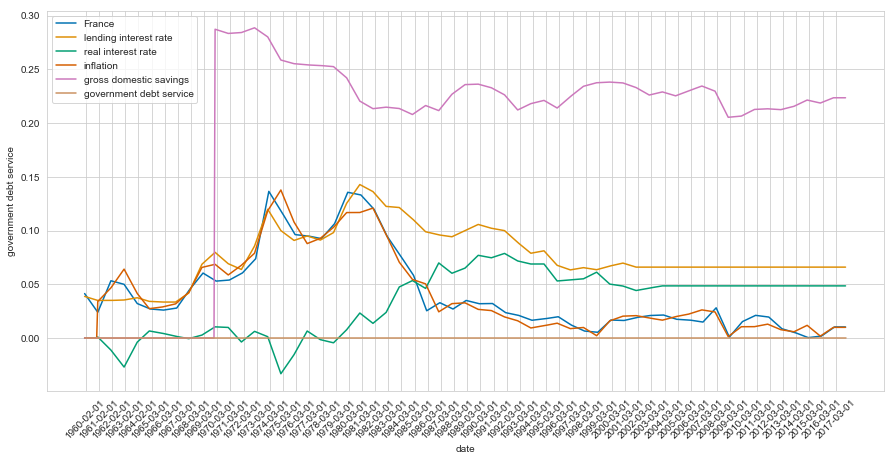

In [95]:
fig, ax = plt.subplots(figsize=(15,7))
[sns.lineplot(x='date', y=c, markers=True, ax=ax, label=c, data=combined_df) for c in list([country, 'lending interest rate', 'real interest rate', 'inflation', 'gross domestic savings', 'government debt service'])]

xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 12 == 1:
        xticks[i].set_visible(True)
    else:
        xticks[i].set_visible(False)

ax.set_xticklabels(combined_df['date'], rotation=45);

In [99]:
combined_df.columns

Index(['date', 'bank capital to assets ratio', 'bank nonperforming loans',
       'cereal yield', 'energy imports', 'food exports', 'high-tech exports',
       'inflation', 'lending interest rate', 'life expectancy',
       'population density', 'real interest rate', 'broad money',
       'exports of goods and services', 'gross domestic savings',
       'high-tech value added', 'household consumption expenditure',
       'imports of goods and services', 'listed companies',
       'manufacturing value added', 'r and d spend', 'services trade', 'trade',
       'government debt service', 'government interest payments external debt',
       'government tax revenue', 'birth deaths', 'broadband subscriptions',
       'electricity access', 'co2 emissions', 'electricity consumption',
       'mobile subscriptions', 'newborns', 'overweight', 'rural population',
       'urban population', 'Brazil', 'China', 'Colombia', 'France', 'Ghana',
       'India', 'Indonesia', 'Japan', 'Netherlands', 'Seneg

### Prepare the country features

In [107]:
base_feature_df = combined_df[['date', 'bank capital to assets ratio', 'bank nonperforming loans', 'cereal yield',
                               'energy imports', 'food exports', 'high-tech exports', 'inflation',
                               'lending interest rate', 'life expectancy', 'population density', 'real interest rate',
                               'broad money', 'exports of goods and services', 'gross domestic savings',
                               'high-tech value added', 'household consumption expenditure',
                               'imports of goods and services', 'listed companies', 'manufacturing value added',
                               'r and d spend', 'services trade', 'trade', 'government debt service',
                               'government interest payments external debt', 'government tax revenue', 'birth deaths',
                               'broadband subscriptions', 'electricity access', 'co2 emissions',
                               'electricity consumption', 'mobile subscriptions', 'newborns', 'overweight',
                               'rural population', 'urban population', country]]

In [110]:
base_feature_df.to_csv('features/m_one/combined_country_level_%s.csv' % country.lower(), sep=',', index=False)

In [111]:
base_feature_df['label'] = base_feature_df[country].shift(periods=1)
base_df = base_feature_df.drop(country, axis=1).fillna(0.00);
base_df.set_index('date')

,bank capital to assets ratio,bank nonperforming loans,cereal yield,energy imports,food exports,high-tech exports,inflation,lending interest rate,life expectancy,population density,...,broadband subscriptions,electricity access,co2 emissions,electricity consumption,mobile subscriptions,newborns,overweight,rural population,urban population,label
date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0.0000,0.0000,0.0000,0.4282,0.0000,0.0000,0.0000,0.0387,69.8683,0.0000,...,0.0000,0.0000,5.7935,1.4567,0.0000,0.0187,0.0000,0.3812,0.6188,0.0000
1960-02-01,0.0000,0.0000,0.0000,0.4313,0.0000,0.0000,0.0000,0.0384,69.8890,0.0000,...,0.0000,0.0000,5.8046,1.4639,0.0000,0.0187,0.0000,0.3806,0.6194,0.0414
1960-03-01,0.0000,0.0000,0.0000,0.4344,0.0000,0.0000,0.0000,0.0381,69.9098,0.0000,...,0.0000,0.0000,5.8158,1.4712,0.0000,0.0187,0.0000,0.3800,0.6200,0.0399
1960-04-01,0.0000,0.0000,0.0000,0.4375,0.0000,0.0000,0.0000,0.0378,69.9305,0.0000,...,0.0000,0.0000,5.8269,1.4784,0.0000,0.0187,0.0000,0.3794,0.6206,0.0385
1960-05-01,0.0000,0.0000,0.0000,0.4406,0.0000,0.0000,0.0000,0.0375,69.9512,0.0000,...,0.0000,0.0000,5.8380,1.4857,0.0000,0.0187,0.0000,0.3788,0.6212,0.0371
1960-06-01,0.0000,0.0000,0.0000,0.4436,0.0000,0.0000,0.0000,0.0372,69.9720,0.0000,...,0.0000,0.0000,5.8492,1.4930,0.0000,0.0187,0.0000,0.3782,0.6218,0.0356
1960-07-01,0.0000,0.0000,0.0000,0.4467,0.0000,0.0000,0.0000,0.0369,69.9927,0.0000,...,0.0000,0.0000,5.8603,1.5002,0.0000,0.0187,0.0000,0.3776,0.6224,0.0342
1960-08-01,0.0000,0.0000,0.0000,0.4498,0.0000,0.0000,0.0000,0.0366,70.0134,0.0000,...,0.0000,0.0000,5.8715,1.5075,0.0000,0.0187,0.0000,0.3770,0.6230,0.0327
1960-09-01,0.0000,0.0000,0.0000,0.4529,0.0000,0.0000,0.0000,0.0362,70.0341,0.0000,...,0.0000,0.0000,5.8826,1.5147,0.0000,0.0187,0.0000,0.3764,0.6236,0.0313


In [112]:
num_obs = len(base_df)
num_cols = len(base_df.columns)
num_features = len(base_df.columns) - 1

### Model iterations
---------------------

### Exploration 1

**Multivariate LSTM** fitted on the real data, see https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
- Activation function: Leaky ReLU.
- Loss function: mean squared error.
- Optimizer: adam.
- Num observations source dataset: 684 (using lagshift, 1960-2016 inclusive monthly)
- Num sequences (@ sequence length 6): 116.
- Batch size: 4-8 sequences (although `size=48` would lead to more stable training)

In [256]:
from keras import Sequential
from keras.layers import LSTM, Dense, LeakyReLU, TimeDistributed
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [257]:
lstm_params = {
   'sequence_length': 4,
   'batch_size': 8,
   'num_epochs': 600,
   'num_units': 128,
   'lrelu_alpha': 0.3
}

#### LSTM features

In [258]:
features = []
labels = []

for i in range(int(num_obs / lstm_params['sequence_length'])):
    labels_df = base_df['label']
    labels.append(labels_df[i:(i+lstm_params['sequence_length'])].values[-1:])
    features.append(base_df[i:(i+lstm_params['sequence_length'])].values)

In [259]:
lstm_train_X = np.asarray(features[0:100])
lstm_train_X = lstm_train_X.reshape((lstm_train_X.shape[0], lstm_params['sequence_length'], num_cols))
lstm_train_y = np.asarray(labels[0:100])
lstm_train_y = lstm_train_y.reshape((lstm_train_y.shape[0]))

In [260]:
lstm_test_X = np.asarray(features[100:])
lstm_test_X = lstm_test_X.reshape((lstm_test_X.shape[0], lstm_params['sequence_length'], num_cols))
lstm_test_y = np.asarray(labels[100:])
lstm_test_y = lstm_test_y.reshape((lstm_test_y.shape[0]))

In [261]:
X = np.asarray(features)
X = X.reshape((X.shape[0], lstm_params['sequence_length'], num_cols))
y = np.asarray(labels)
y = y.reshape((y.shape[0], 1))

In [262]:
print('X: %s, y: %s' % (X.shape, y.shape))

X: (174, 4, 37), y: (174, 1)


#### Model: LSTM

In [263]:
model = Sequential()
model.add(LSTM(lstm_params['num_units'], input_shape=(lstm_params['sequence_length'], num_cols)))
model.add(Dense(1, activation=LeakyReLU(alpha=lstm_params['lrelu_alpha'])))
model.compile(loss='mse', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 128)               84992     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 129       
Total params: 85,121
Trainable params: 85,121
Non-trainable params: 0
_________________________________________________________________


In [264]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='loss', mode='min', patience=8)

In [265]:
train_run = model.fit(lstm_train_X, lstm_train_y, epochs=lstm_params['num_epochs'],
                      batch_size=lstm_params['batch_size'], callbacks=[early_stopping])

Epoch 1/600
100/100 [==============================] - 6s 65ms/step - loss: 0.0033
Epoch 2/600
100/100 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 3/600
100/100 [==============================] - 0s 1ms/step - loss: 3.2883e-04
Epoch 4/600
100/100 [==============================] - 0s 1ms/step - loss: 1.6117e-04
Epoch 5/600
100/100 [==============================] - 0s 1ms/step - loss: 1.1641e-04
Epoch 6/600
100/100 [==============================] - 0s 1ms/step - loss: 8.5800e-05
Epoch 7/600
100/100 [==============================] - 0s 1ms/step - loss: 9.0255e-05
Epoch 8/600
100/100 [==============================] - 0s 1ms/step - loss: 7.2625e-05
Epoch 9/600
100/100 [==============================] - 0s 1ms/step - loss: 6.5008e-05
Epoch 10/600
100/100 [==============================] - 0s 1ms/step - loss: 6.0714e-05
Epoch 11/600
100/100 [==============================] - 0s 1ms/step - loss: 5.7966e-05
Epoch 12/600
100/100 [==============================] - 0s 

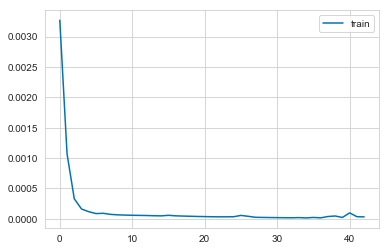

In [266]:
plt.plot(train_run.history['loss'], label='train')
plt.legend()
plt.show()

##### Evaluate model performance

In [267]:
model.evaluate(lstm_test_X, lstm_test_y)

74/74 [==============================] - 2s 28ms/step


0.00012380006562641546

In [268]:
yhat = model.predict(lstm_test_X)

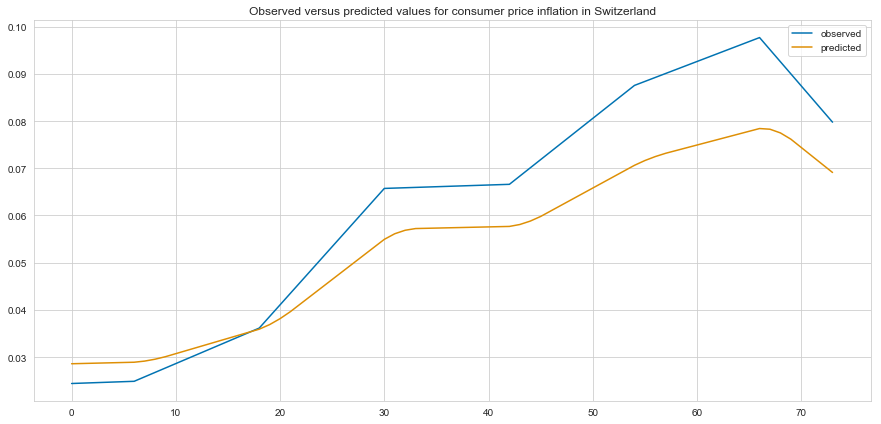

In [269]:
plt.figure(figsize=(15,7))
plt.plot(lstm_test_y, label='observed')
plt.plot(yhat, label='predicted')
plt.legend()
plt.title('Observed versus predicted values for consumer price inflation in %s' % country)
plt.show()

In [270]:
print('rmse: %s\nmean observed: %s\nmean predicted: %s' % (np.sqrt(mean_squared_error(lstm_test_y, yhat)),
                                                           np.mean(lstm_test_y), np.mean(yhat)))

rmse: 0.011126547316903544
mean observed: 0.06255287441170312
mean predicted: 0.054270532


## Exploration 2
--------------------

**GAN** to generate training data, **LSTM** trained on generated data validated on the real data.

### Conditional GAN for policy-constrained timeseries generation

See https://arxiv.org/pdf/1706.02633.pdf.

In [113]:
from keras.models import Sequential, Model
from keras.layers import Input
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [135]:
gan_df = base_df[['label', 'inflation']]
gan_df.shape

(696, 2)

In [136]:
gan_cols = gan_df.shape[1]

In [137]:
gan_params = {
   'num_epochs': 800,
   'save_interval': 100,
   'sequence_length': 6,
   'num_variables': gan_cols,
   'batch_size': 64,
   'lr': 0.0001 
}

In [138]:
generator_params = {
   'noise_sigma': 0.3,
   'lstm_units': 128,
   'lstm_dropout': 0.4,
   'gru_units': 64,
   'lr': 0.0001
}

In [139]:
discriminator_params = {
   'bi_lstm_units': 256,
   'dropout_rate': 0.4,
   'lr': 0.0001
}

#### GAN input sequences

The collated World Bank and IMF data used as input for the data generator and to validate the model trained on generated data.

In [140]:
gan_features = []
gan_labels = []

for i in range(int(num_obs / gan_params['sequence_length'])):
    gan_labels_df = gan_df['label']
    gan_labels.append(gan_labels_df[i:(i+gan_params['sequence_length'])].values[-1:])
    gan_features.append(gan_df[i:(i+gan_params['sequence_length'])].values)

In [141]:
real = np.asarray(gan_features)
real = real.reshape((real.shape[0], gan_params['sequence_length'], gan_cols))

In [142]:
real.shape

(116, 6, 2)

#### Generator

In [143]:
from keras.layers import GaussianNoise, LSTM, Dropout, BatchNormalization, Dense, LocallyConnected2D, GRU, Reshape

In [144]:
def build_encoder(params):
    gshape = params['sequence_length'], params['num_variables']
    inputs = Input(shape=(gshape))
    
    e = Sequential(name='encoder')
    e.add(LSTM(params['lstm_units'], input_shape=(gshape), return_sequences=True))
    e.add(Dropout(params['lstm_dropout']))
    e.add(GaussianNoise(stddev=params['noise_sigma']))
    e.add(BatchNormalization(axis=2, momentum=0.8, epsilon=0.01))
    e.add(Dense(params['num_variables'], activation='relu'))
    e.summary()
    
    return Model(inputs, e(inputs))

In [145]:
encoder = build_encoder({**gan_params, **generator_params})

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 6, 128)            67072     
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 128)            0         
_________________________________________________________________
gaussian_noise_2 (GaussianNo (None, 6, 128)            0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 6, 128)            512       
_________________________________________________________________
dense_4 (Dense)              (None, 6, 2)              258       
Total params: 67,842
Trainable params: 67,586
Non-trainable params: 256
_________________________________________________________________


In [146]:
def build_generator(params):
    gshape = params['sequence_length'], params['num_variables']
    inputs = Input(shape=(gshape))
    
    g = Sequential(name='generator')
    g.add(GRU(params['gru_units'], input_shape=(gshape), return_sequences=True))
    g.add(Dense(params['num_variables'], activation='softmax'))
    g.add(Reshape(target_shape=(gshape)))
    g.summary()
    
    return Model(inputs, g(inputs))

In [147]:
generator = build_generator({**gan_params, **generator_params})

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 6, 64)             12864     
_________________________________________________________________
dense_5 (Dense)              (None, 6, 2)              130       
_________________________________________________________________
reshape_2 (Reshape)          (None, 6, 2)              0         
Total params: 12,994
Trainable params: 12,994
Non-trainable params: 0
_________________________________________________________________


#### Discriminator

In [148]:
from keras.layers import Bidirectional, LSTM, Dense, concatenate, Flatten

In [149]:
def build_discriminator(params):
    dshape = params['sequence_length'], params['num_variables']
    batch_shape = params['batch_size'], params['sequence_length'], params['num_variables']
    
    real = Input(shape=(dshape))
    generated = Input(shape=(dshape))
    inputs = concatenate([generated, real], axis=1)
    
    d = Sequential(name='discriminator')
    d.add(Bidirectional(LSTM(params['bi_lstm_units']), batch_input_shape=(batch_shape)))
    d.add(Dropout(params['dropout_rate']))
    d.add(Dense(1, activation='sigmoid'))
    d.summary()
    return Model([generated, real], d(inputs))

In [150]:
discriminator = build_discriminator({**gan_params, **discriminator_params})
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=discriminator_params['lr']), metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (64, 512)                 530432    
_________________________________________________________________
dropout_4 (Dropout)          (64, 512)                 0         
_________________________________________________________________
dense_6 (Dense)              (64, 1)                   513       
Total params: 530,945
Trainable params: 530,945
Non-trainable params: 0
_________________________________________________________________


#### GAN

Bidirectional generative adversarial network, viz https://arxiv.org/abs/1605.09782.

In [151]:
def build_gan(encoder, generator, discriminator, params):
    ganshape = params['sequence_length'], params['num_variables']
    discriminator.trainable = False
    
    noise = Input(shape=(ganshape))
    generated = generator(noise)
    
    data = Input(shape=(ganshape))
    encoded = encoder(data)
    
    fake = discriminator([noise, generated])
    real = discriminator([encoded, data])
    
    gan = Model([noise, data], [fake, real], name='gan')
    gan.summary()
    return gan

In [152]:
gan = build_gan(encoder, generator, discriminator, gan_params)
gan.compile(loss=['kullback_leibler_divergence', 'kullback_leibler_divergence'], 
            optimizer=Adam(lr=generator_params['lr']), metrics=['mse', 'mse'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 6, 2)         0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           (None, 6, 2)         0                                            
__________________________________________________________________________________________________
model_5 (Model)                 (None, 6, 2)         12994       input_11[0][0]                   
__________________________________________________________________________________________________
model_4 (Model)                 (None, 6, 2)         67842       input_12[0][0]                   
__________________________________________________________________________________________________
model_6 (M

In [153]:
def train_gan(real, batch_size, params):
    g_metrics = []
    d_real_metrics = []
    d_synth_metrics = []
    
    reals = np.ones(batch_size)
    synths = np.zeros(batch_size)
    
    for i in range(params['num_epochs']):
        # create input of real and synthetic data
        random_index = np.random.randint(0, len(real) - batch_size)
        half_real = real[random_index:int(random_index + batch_size)]
        half_synth = np.random.normal(-1.0, 1.0, size=[batch_size, params['sequence_length'], real.shape[2]])
        
        # apply generator and encoder
        generated = generator.predict(half_synth)
        encoded = encoder.predict(half_real)
        
        # train discriminator
        d_real = discriminator.train_on_batch([encoded, half_real], reals)
        d_synth = discriminator.train_on_batch([half_synth, generated], synths)
                                                            
        # train gan
        gen_ = gan.train_on_batch([half_synth, half_real], [reals, synths])
        if i % 100 == 0:
            print('Epoch %s losses: discriminator real: %.4f%%, discriminator synth: %.4f%%, generator: %.4f%%' % 
                  (i, d_real[0], d_synth[0], gen_[0]))
        
        d_real_metrics.append(d_real)
        d_synth_metrics.append(d_synth)
        g_metrics.append(gen_)
    return d_real_metrics, d_synth_metrics, g_metrics

In [154]:
d_r_metrics, d_s_metrics, g_metrics = train_gan(real, gan_params['batch_size'], gan_params)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 0 losses: discriminator real: 0.6930%, discriminator synth: 0.7101%, generator: 0.6793%
Epoch 100 losses: discriminator real: 0.0202%, discriminator synth: 0.0146%, generator: 6.3374%
Epoch 200 losses: discriminator real: 0.0078%, discriminator synth: 0.0018%, generator: 6.7049%
Epoch 300 losses: discriminator real: 0.0076%, discriminator synth: 0.0037%, generator: 7.9261%
Epoch 400 losses: discriminator real: 0.0047%, discriminator synth: 0.0000%, generator: 13.1254%
Epoch 500 losses: discriminator real: 0.0008%, discriminator synth: 0.0000%, generator: 15.6531%
Epoch 600 losses: discriminator real: 0.0005%, discriminator synth: 0.0000%, generator: 16.1099%
Epoch 700 losses: discriminator real: 0.0002%, discriminator synth: 0.0000%, generator: 16.0731%


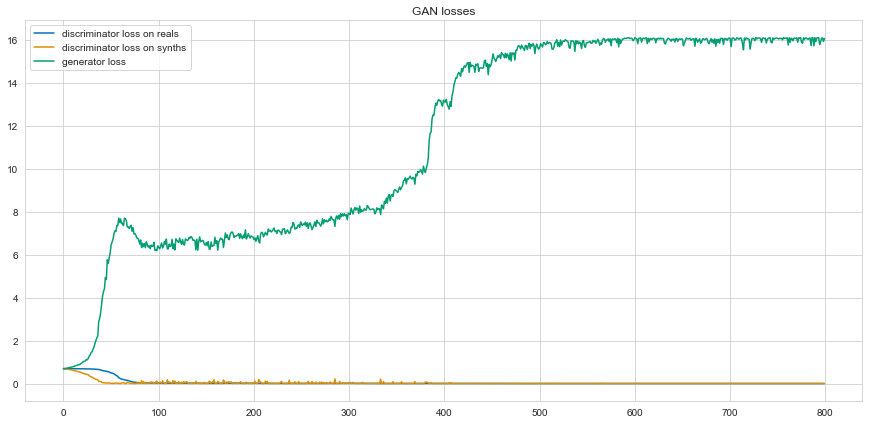

In [155]:
plt.figure(figsize=(15,7))
plt.plot([metrics[0] for metrics in d_r_metrics], label='discriminator loss on reals')
plt.plot([metrics[0] for metrics in d_s_metrics], label='discriminator loss on synths')
plt.plot([metrics[0] for metrics in g_metrics], label='generator loss')
plt.legend()
plt.title('GAN losses')
plt.show()

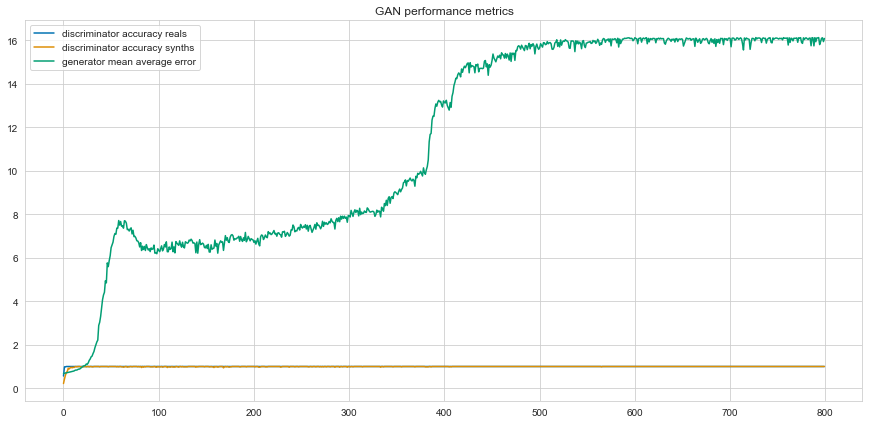

In [156]:
plt.figure(figsize=(15,7))
plt.plot([metrics[1] for metrics in d_r_metrics], label='discriminator accuracy reals')
plt.plot([metrics[1] for metrics in d_s_metrics], label='discriminator accuracy synths')
plt.plot([metrics[1] for metrics in g_metrics], label='generator mean average error')
plt.legend()
plt.title('GAN performance metrics')
plt.show()

In [157]:
generated_y = generator.predict(np.random.rand(num_obs, gan_params['sequence_length'], gan_cols))[:,-1,-1]
gan_y = gan_df['label'].values

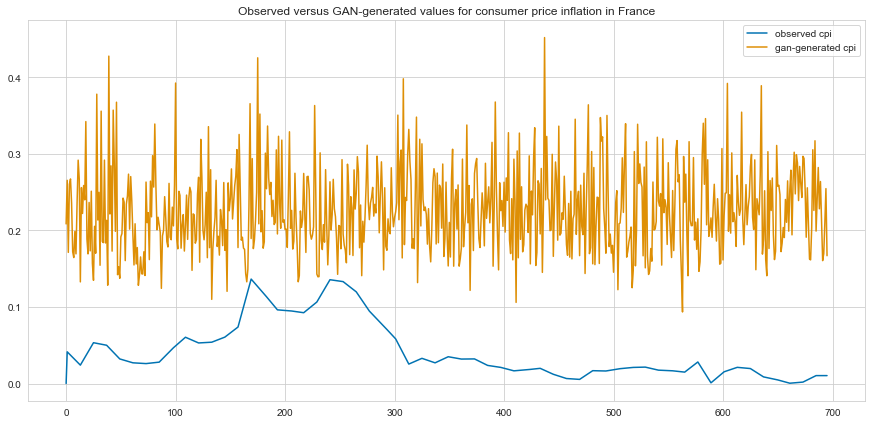

In [158]:
plt.figure(figsize=(15,7))
plt.plot(gan_y, label='observed cpi')
plt.plot(generated_y, label='gan-generated cpi')
plt.legend()
plt.title('Observed versus GAN-generated values for consumer price inflation in %s' % country)
plt.show()

In [159]:
print('rmse: %s\nmean observed: %s\nmean generated: %s' % (np.sqrt(mean_squared_error(gan_y, generated_y)),
                                                           np.mean(gan_y), np.mean(generated_y)))

rmse: 0.1967743200026024
mean observed: 0.04203555603346822
mean generated: 0.22668342


## Exploration 3
--------------------

**Sequence transformer network** to generate training data, **LSTM** trained on generated data validated on the real data. See https://arxiv.org/abs/1808.06725